<a href="https://colab.research.google.com/github/savitskaya-om/da_homework/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Cluster_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [ ]:
#!git clone 'https://github.com/da-python/python-for-data-analytics'

Cloning into 'python-for-data-analytics'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 274 (delta 68), reused 135 (delta 46), pack-reused 106
Receiving objects: 100% (274/274), 29.58 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [ ]:
df = pd.read_csv('python-for-data-analytics/Lesson4/hometask/test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [ ]:
df2 = df.head(2000)

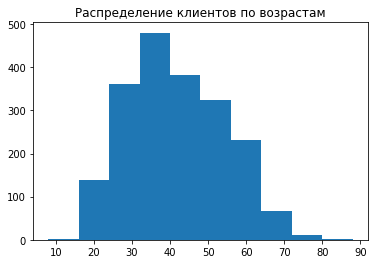

In [ ]:
plt.hist(df2.age)
plt.title ("Распределение клиентов по возрастам")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


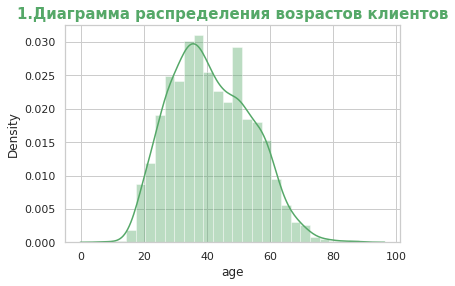

In [ ]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df2.age,
    color='g', 
    rug=False, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения возрастов клиентов', size=15, color='g', weight='bold')
plt.show();

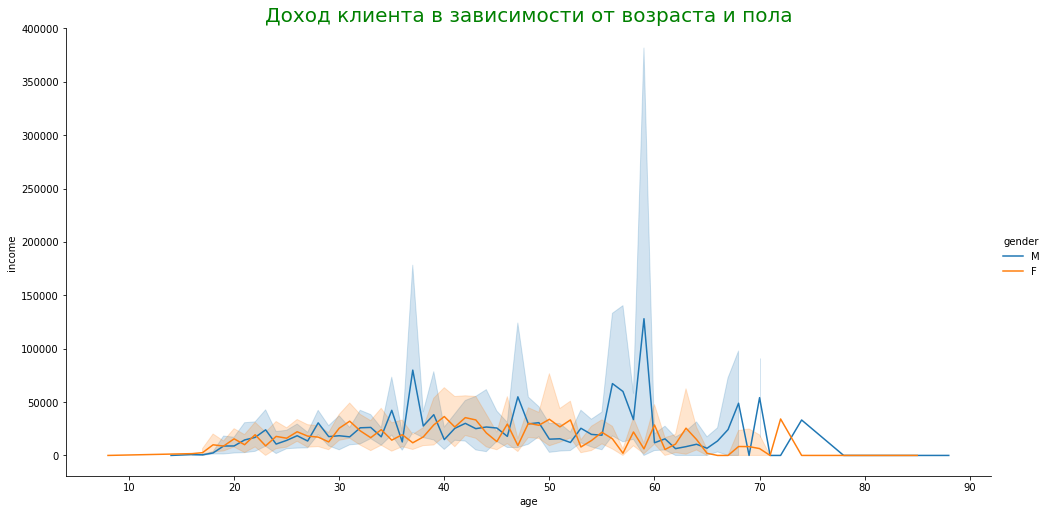

In [ ]:
sns.relplot(x=df2.age,
            y=df2.income,
            hue=df2.gender,
            aspect=2,
            height=7,
            kind='line')
plt.title('Доход клиента в зависимости от возраста и пола', size=20, color='g');

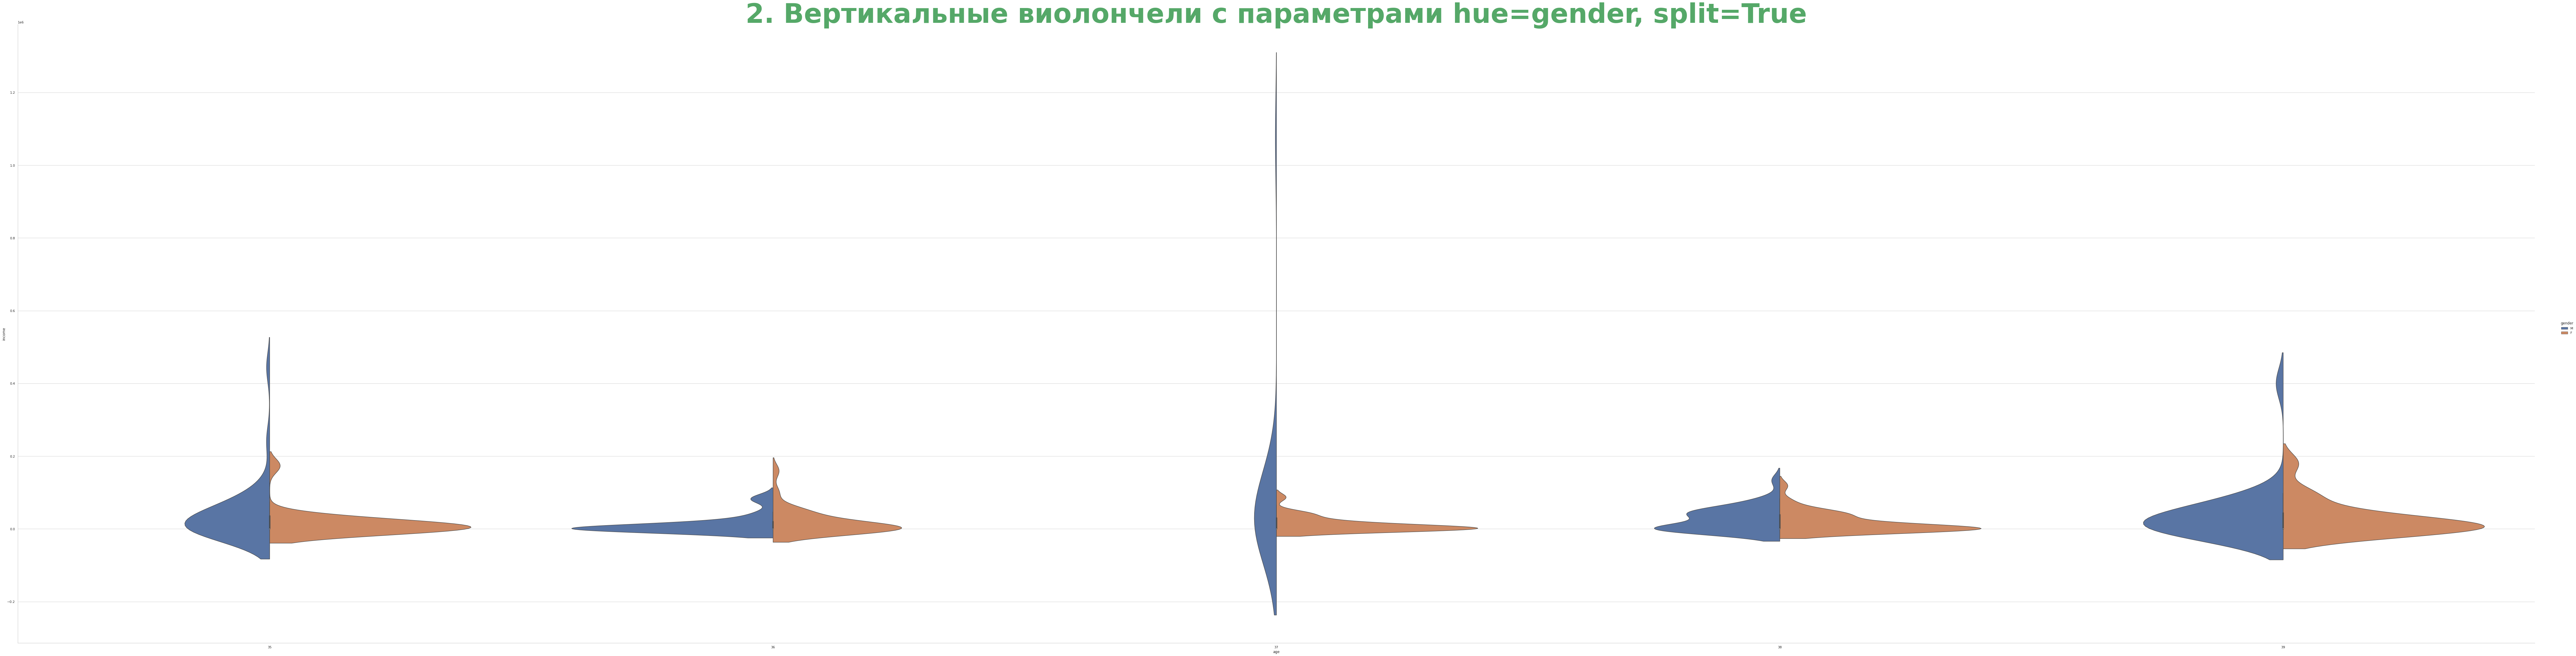

In [ ]:
sns.catplot(
    x='age', 
    y='income', 
    data=df2.query("age > 34 and age<40"), 
    kind='violin', 
    hue='gender', 
    split=True, 
    height=30, 
    aspect=4) 

plt.title('2. Вертикальные виолончели с параметрами hue=gender, split=True', size=90, color='g', weight='bold');

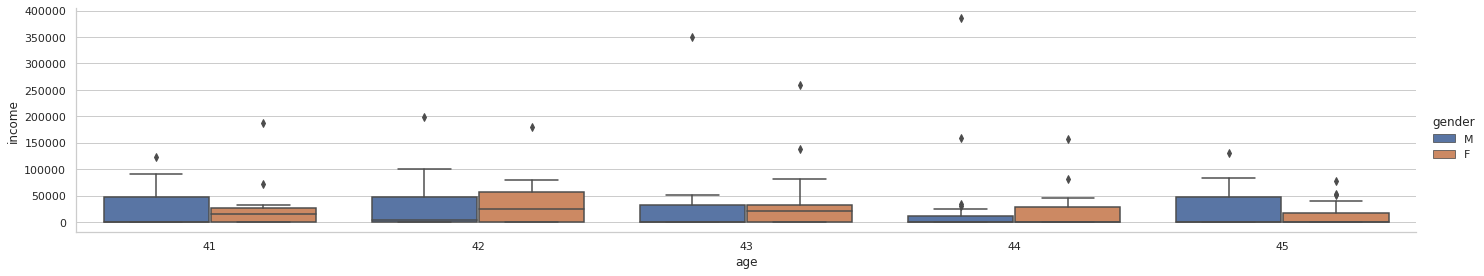

In [ ]:
sns.catplot(
    x='age', 
    y='income', 
    data=df2.query("age > 40 and age<46"), 
    kind='box', 
    hue='gender', 
    height=4, 
    aspect=5); 

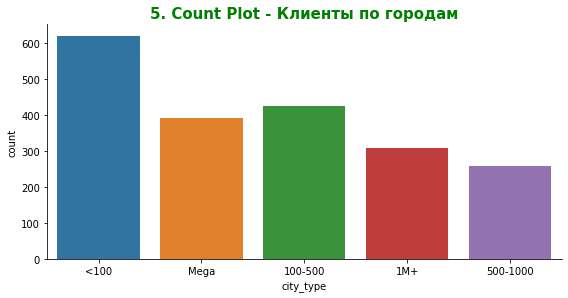

In [ ]:
# Count Plot показывает количество наблюдений

sns.catplot(x='city_type', 
            data=df2, 
            kind='count', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Клиенты по городам', size=15, color='g', weight='bold');

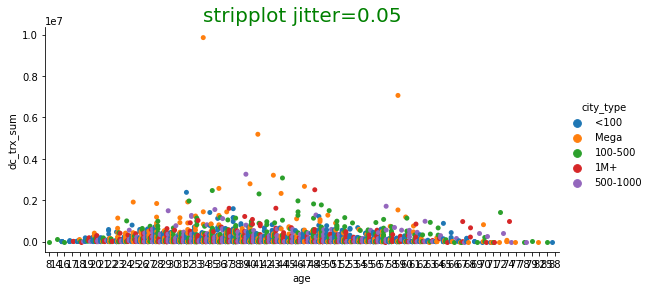

In [ ]:
sns.catplot(
    x='age',
    y='dc_trx_sum', 
    data=df2, 
    hue='city_type',    # оба на одном графике разными цветами
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');